## Import Lib

In [45]:
# IMPORTING LIBRARIES & MAIN PATH

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

# Defining the working directories


In [46]:
# IMPORTING DATA

house_data = pd.read_csv('/kaggle/input/ames-housing-dataset/AmesHousing.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
data_w = house_data.copy()
data_w.columns = data_w.columns.str.replace(' ', '') # Replacing the white spaces in columns' names
data_w.head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### EDA & VISUALIZATION

In [47]:
data_w['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

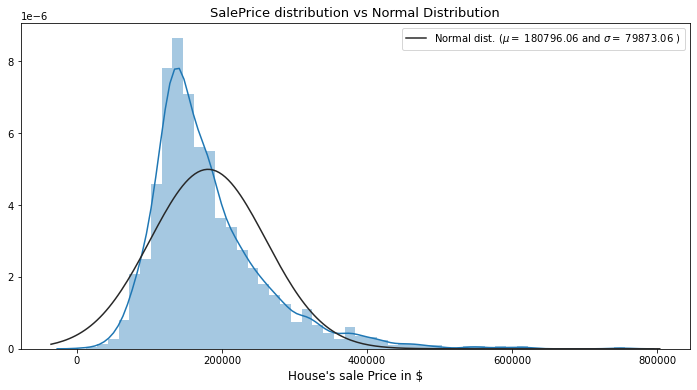

In [48]:
# Getting the main parameters of the Normal Ditribution ()
(mu, sigma) = norm.fit(data_w['SalePrice'])

plt.figure(figsize = (12,6))
sns.distplot(data_w['SalePrice'], kde = True, hist=True, fit = norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()

In [49]:
# Skew and kurt
from scipy import stats

shap_t,shap_p = stats.shapiro(data_w['SalePrice'])

print("Skewness: %f" % abs(data_w['SalePrice']).skew())
print("Kurtosis: %f" % abs(data_w['SalePrice']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 1.743500
Kurtosis: 5.118900
Shapiro_Test: 0.876261
Shapiro_Test: 0.000000


### Correlation

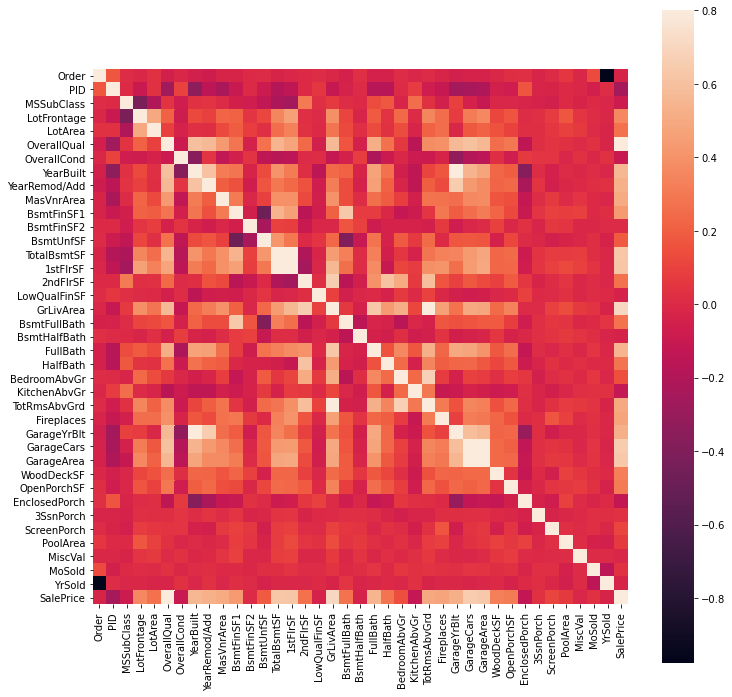

In [50]:
# Correlation Matrix

#correlation matrix
corrmat = data_w.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

In [51]:
correlation = data_w.corr()['SalePrice']
correlation = correlation.sort_values(ascending=False)
print(correlation)

SalePrice        1.000000
OverallQual      0.799262
GrLivArea        0.706780
GarageCars       0.647877
GarageArea       0.640401
TotalBsmtSF      0.632280
1stFlrSF         0.621676
YearBuilt        0.558426
FullBath         0.545604
YearRemod/Add    0.532974
GarageYrBlt      0.526965
MasVnrArea       0.508285
TotRmsAbvGrd     0.495474
Fireplaces       0.474558
BsmtFinSF1       0.432914
LotFrontage      0.357318
WoodDeckSF       0.327143
OpenPorchSF      0.312951
HalfBath         0.285056
BsmtFullBath     0.276050
2ndFlrSF         0.269373
LotArea          0.266549
BsmtUnfSF        0.182855
BedroomAbvGr     0.143913
ScreenPorch      0.112151
PoolArea         0.068403
MoSold           0.035259
3SsnPorch        0.032225
BsmtFinSF2       0.005891
MiscVal         -0.015691
YrSold          -0.030569
Order           -0.031408
BsmtHalfBath    -0.035835
LowQualFinSF    -0.037660
MSSubClass      -0.085092
OverallCond     -0.101697
KitchenAbvGr    -0.119814
EnclosedPorch   -0.128787
PID         

Notice that  "OverallQuall", "GrlivArea", "TotalBsmtSF" are the most realted to SalePrice

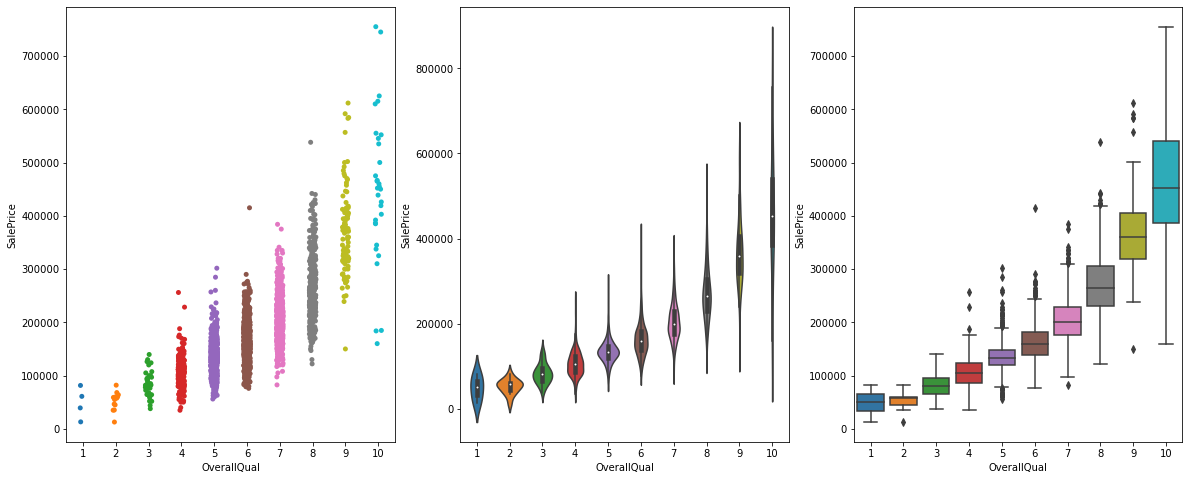

In [52]:
# OverallQuall - SalePrice [Pearson = 0.8]

figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=data_w, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=data_w, x = 'OverallQual', y='SalePrice', ax = ax[1])
sns.boxplot(data=data_w, x = 'OverallQual', y='SalePrice', ax = ax[2])
plt.show()

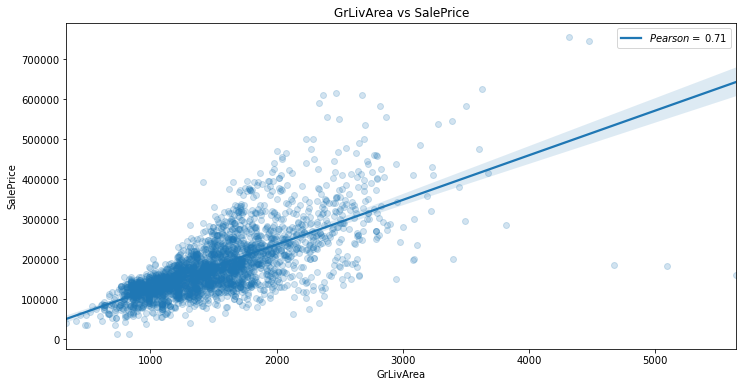

In [53]:
# GrLivArea vs SalePrice [corr = 0.71]

Pearson_GrLiv = 0.71
plt.figure(figsize = (12,6))
sns.regplot(data=data_w, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

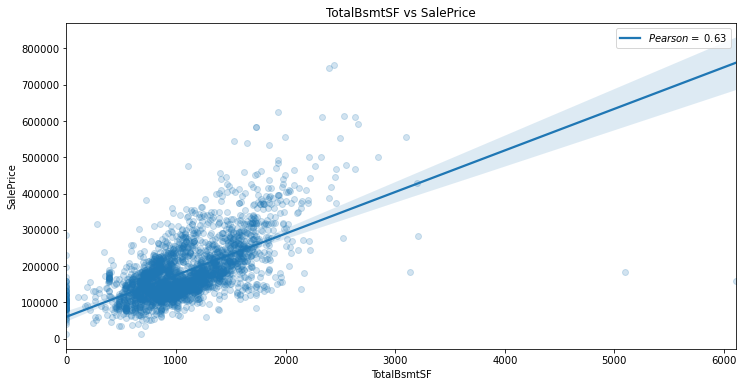

In [54]:
# TotalBsmtSF vs SalePrice [corr=0.63]
Pearson_TBSF = 0.63
plt.figure(figsize = (12,6))
sns.regplot(data=data_w, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_TBSF)], loc = 'best')
plt.show()

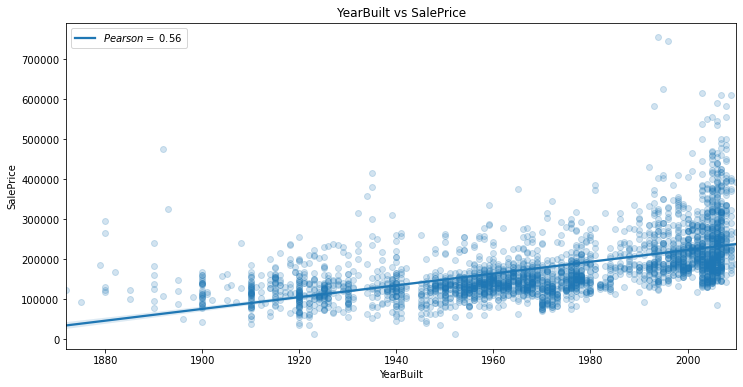

In [55]:
# YearBuilt vs SalePrice

Pearson_YrBlt = 0.56
plt.figure(figsize = (12,6))
sns.regplot(data=data_w, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBlt)], loc = 'best')
plt.show()

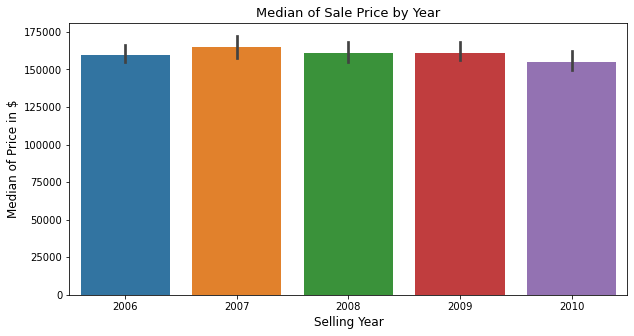

In [56]:
# Median of Sale Price by Year

plt.figure(figsize = (10,5))
sns.barplot(x='YrSold', y="SalePrice", data = data_w, estimator = np.median)
plt.title('Median of Sale Price by Year', fontsize = 13)
plt.xlabel('Selling Year', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

###  DATA PREPROCESSING

Now that we have some insights about data, we need to preprocess them for the modeling part. The main steps are:

- Looking at potential missing value
- Dealing with categorical features (e.g. Dummy coding)
- Normalization

In [57]:
# Separating Target and Features

target = data_w['SalePrice']
test_id = test['Id']
test = test.drop(['Id'],axis = 1)
data_w2 = data_w.drop(['SalePrice','Order','PID'], axis = 1)


# Concatenating train & test set

train_test = pd.concat([data_w2,test], axis=0, sort=False)

In [58]:
target.shape

(2930,)

In [59]:
# Looking at missing value percents

total = data_w.isnull().sum().sort_values(ascending=False)
percent = (data_w.isnull().sum()/data_w.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2917,0.995563
MiscFeature,2824,0.963823
Alley,2732,0.932423
Fence,2358,0.804778
FireplaceQu,1422,0.485324
LotFrontage,490,0.167235
GarageQual,159,0.054266
GarageYrBlt,159,0.054266
GarageCond,159,0.054266
GarageFinish,159,0.054266


In [60]:
# Converting non-numeric predictors stored as numbers into string

train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

# Filling Categorical NaN (That we know how to fill due to the description file )

train_test['Functional'] = train_test['Functional'].fillna('Typ')
train_test['Electrical'] = train_test['Electrical'].fillna("SBrkr")
train_test['KitchenQual'] = train_test['KitchenQual'].fillna("TA")
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])
train_test["PoolQC"] = train_test["PoolQC"].fillna("None")
train_test["Alley"] = train_test["Alley"].fillna("None")
train_test['FireplaceQu'] = train_test['FireplaceQu'].fillna("None")
train_test['Fence'] = train_test['Fence'].fillna("None")
train_test['MiscFeature'] = train_test['MiscFeature'].fillna("None")

for col in ('GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)
        
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_test[col] = train_test[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test[col] = train_test[col].fillna('None')
    
    # Checking the features with NaN remained out

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])

0    RL
0    RH
Name: MSZoning, dtype: object
0    141.0
0     80.0
Name: LotFrontage, dtype: float64
0    AllPub
0    AllPub
Name: Utilities, dtype: object
0    1960.0
0       NaN
Name: YearRemod/Add, dtype: float64
0    Stone
0     None
Name: MasVnrType, dtype: object
0    112.0
0      0.0
Name: MasVnrArea, dtype: float64
0    639.0
0    468.0
Name: BsmtFinSF1, dtype: float64
0      0.0
0    144.0
Name: BsmtFinSF2, dtype: float64
0    441.0
0    270.0
Name: BsmtUnfSF, dtype: float64
0    1080.0
0     882.0
Name: TotalBsmtSF, dtype: float64
0    1.0
0    0.0
Name: BsmtFullBath, dtype: float64
0    0.0
0    0.0
Name: BsmtHalfBath, dtype: float64
0    1960.0
0    1961.0
Name: GarageYrBlt, dtype: float64
0       NaN
0    1961.0
Name: YearRemodAdd, dtype: float64


In [61]:
# Removing the useless variables

useless = ['GarageYrBlt','YearRemodAdd'] 
train_test = train_test.drop(useless, axis = 1)

# Imputing with KnnRegressor (we can also use different Imputers)

def impute_knn(df):
    ttn = train_test.select_dtypes(include=[np.number])
    ttc = train_test.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ttn.columns.difference(cols_nan).values     # columns w/n nan

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ttn.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ttn,ttc],axis=1)

train_test = impute_knn(train_test)


objects = []
for i in train_test.columns:
    if train_test[i].dtype == object:
        objects.append(i)
train_test.update(train_test[objects].fillna('None'))

# # Checking NaN presence

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][0])

### FEATURE ENGINEERING

Let's create some new features combining the ones that we already have. These could help us to increase the performance of the model!

In [62]:
train_test["SqFtPerRoom"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] +
                                                       train_test["FullBath"] +
                                                       train_test["HalfBath"] +
                                                       train_test["KitchenAbvGr"])

train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']

train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                               train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test["HighQualSF"] = train_test["GrLivArea"]+train_test["1stFlrSF"] + train_test["2ndFlrSF"]+0.5*train_test["GarageArea"]+0.5*train_test["TotalBsmtSF"]+1*train_test["MasVnrArea"]
#train_test["LowQualSF"] = train_test["MasVnrArea"] +train_test["WoodDeckSF"]+train_test["OpenPorchSF"]+train_test["EnclosedPorch"]+train_test["3SsnPorch"]+train_test["ScreenPorch"]+train_test["PoolArea"]
#train_test["QualityproductSF"] = train_test["GrLivArea"]*(train_test['OverallQual'])
#train_test["LowQualSF"] = train_test["MasVnrArea"]+train_test["WoodDeckSF"] + train_test["OpenPorchSF"]+train_test["PoolArea"]

train_test["Age"] = pd.to_numeric(train_test["YrSold"])-pd.to_numeric(train_test["YearBuilt"])

train_test["Renovate"] = pd.to_numeric(train_test["YearRemod/Add"])-pd.to_numeric(train_test["YearBuilt"])

# Converting non-numeric predictors stored as numbers into string

train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

# Creating dummy variables from categorical features

train_test_dummy = pd.get_dummies(train_test)

# Fetch all numeric features

#train_test['Id'] = train_test['Id'].apply(str)
numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize skewed features using log_transformation
    
for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

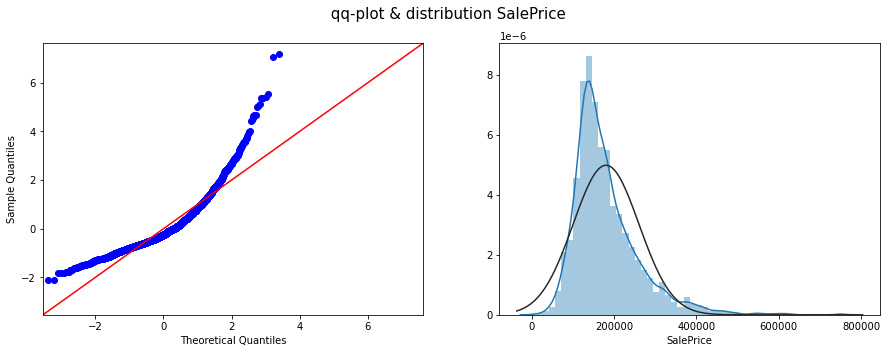

In [63]:
# SalePrice before transformation

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(target, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

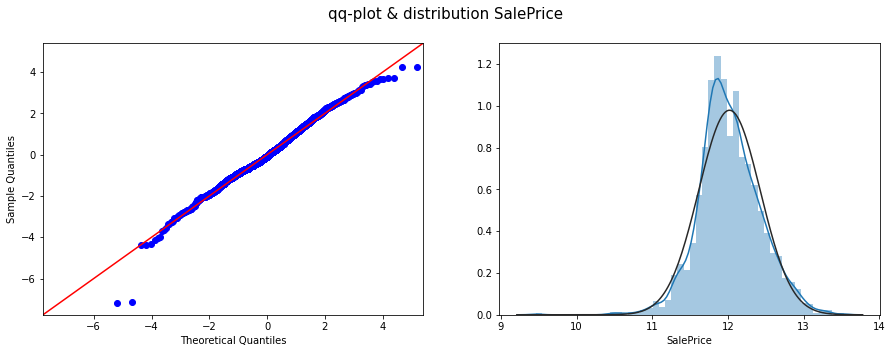

In [64]:
# SalePrice after transformation

target_log = np.log1p(target)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

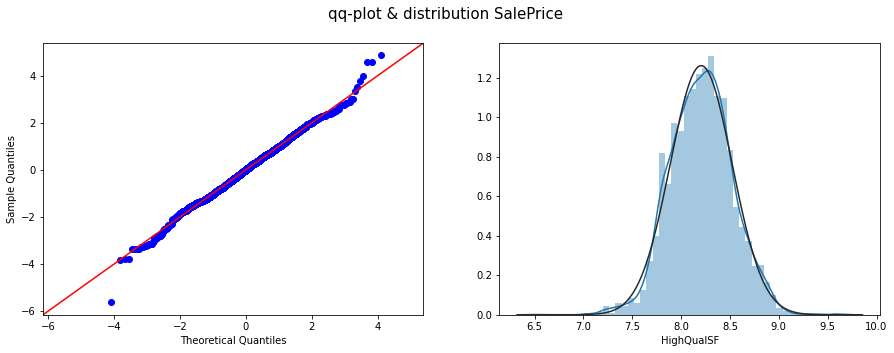

In [65]:
# SalePrice after transformation

HighQualSF_log = np.log1p(train_test["HighQualSF"])

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(HighQualSF_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(HighQualSF_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

train_test["HighQualSF"]= HighQualSF_log

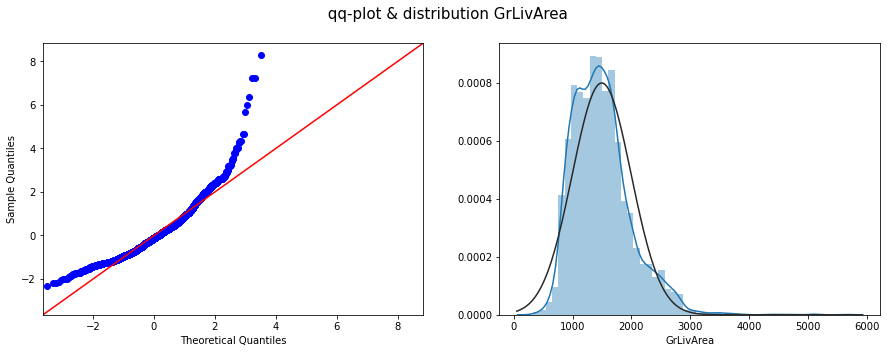

In [66]:
# GrLivArea before transformation

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution GrLivArea ", fontsize= 15)

sm.qqplot(train_test["GrLivArea"], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(train_test["GrLivArea"], kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

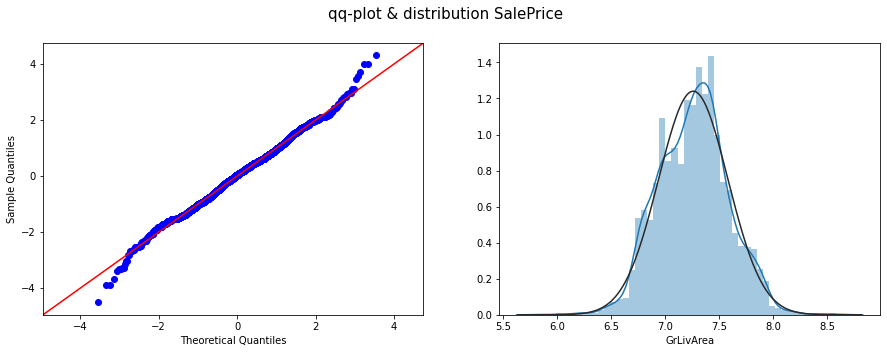

In [67]:
# SalePrice after transformation

GrLivArea_log = np.log1p(train_test["GrLivArea"])

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(GrLivArea_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(GrLivArea_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

train_test["GrLivArea"]= GrLivArea_log

### MODELING

In [68]:
import shap
import xgboost as xgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.ensemble import VotingRegressor

In [69]:
# Train-Test separation

train = train_test_dummy[0:2930]
test = train_test_dummy[2930:]
test['Id'] = test_id

# Creation of the RMSE metric:
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [70]:
# # 10 Fold Cross validation

# kf = KFold(n_splits=10, random_state=42, shuffle=True)

# cv_scores = []
# cv_std = []

# baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.','LGBM_Reg.','SVR',
#                    'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
#                    'Grad_Boost_Reg.','Cat_Boost_Reg.','Stacked_Reg.']

# # Linear Regression

# lreg = LinearRegression()
# score_lreg = cv_rmse(lreg)
# cv_scores.append(score_lreg.mean())
# cv_std.append(score_lreg.std())

# # Bayesian Ridge Regression

# brr = BayesianRidge(compute_score=True)
# score_brr = cv_rmse(brr)
# cv_scores.append(score_brr.mean())
# cv_std.append(score_brr.std())

# # Light Gradient Boost Regressor

# l_gbm = LGBMRegressor(objective='regression')
# score_l_gbm = cv_rmse(l_gbm)
# cv_scores.append(score_l_gbm.mean())
# cv_std.append(score_l_gbm.std())

# # Support Vector Regression

# svr = SVR()
# score_svr = cv_rmse(svr)
# cv_scores.append(score_svr.mean())
# cv_std.append(score_svr.std())

# # Decision Tree Regressor

# dtr = DecisionTreeRegressor()
# score_dtr = cv_rmse(dtr)
# cv_scores.append(score_dtr.mean())
# cv_std.append(score_dtr.std())

# # Random Forest Regressor

# rfr = RandomForestRegressor()
# score_rfr = cv_rmse(rfr)
# cv_scores.append(score_rfr.mean())
# cv_std.append(score_rfr.std())

# # XGB Regressor

# xgb = xgb.XGBRegressor()
# score_xgb = cv_rmse(xgb)
# cv_scores.append(score_xgb.mean())
# cv_std.append(score_xgb.std())

# # Gradient Boost Regressor

# gbr = GradientBoostingRegressor()
# score_gbr = cv_rmse(gbr)
# cv_scores.append(score_gbr.mean())
# cv_std.append(score_gbr.std())

# # Cat Boost Regressor

# catb = CatBoostRegressor()
# score_catb = cv_rmse(catb)
# cv_scores.append(score_catb.mean())
# cv_std.append(score_catb.std())

# # Stacked Regressor

# stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
#                                           LinearRegression(),
#                                           BayesianRidge(),
#                                           GradientBoostingRegressor()),
#                               meta_regressor = CatBoostRegressor(),
#                               use_features_in_secondary = True)

# score_stack_gen = cv_rmse(stack_gen)
# cv_scores.append(score_stack_gen.mean())
# cv_std.append(score_stack_gen.std())

# # vote_gen = VotingRegressor(estimators=[('Cat_Boost_Reg', CatBoostRegressor()), 
# #                                              ('Linear_Reg', LinearRegression()), 
# #                                              ('Bayesian_Ridge_Reg', BayesianRidge()),
# #                                              ('Grad_Boost_Reg', GradientBoostingRegressor()), 
# #                                              ('LGBM_Reg', LGBMRegressor(objective='regression'))
# #                                             ])

# # score_vote_gen = cv_rmse(vote_gen)
# # cv_scores.append(score_vote_gen.mean())
# # cv_std.append(score_vote_gen.std())

# final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
# final_cv_score['RMSE_mean'] = cv_scores
# final_cv_score['RMSE_std'] = cv_std

In [71]:
# final_cv_score

In [72]:
# plt.figure(figsize = (12,8))
# sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
# plt.xlabel('Regressors', fontsize = 12)
# plt.ylabel('CV_Mean_RMSE', fontsize = 12)
# plt.xticks(rotation=45)
# plt.show()

In [73]:
# Train-Test split the data

X_train,X_val,y_train,y_val = train_test_split(train,target_log,test_size = 0.5,random_state=42)

X_train,y_train =train,target_log

# Cat Boost Regressor

cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [74]:
cat_pred = cat_model.predict(X_val)
cat_score = rmse(y_val, cat_pred)
cat_score

0.04241045422235089

In [75]:
test_pred = cat_model.predict(test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

,Id,SalePrice
0,1461,112091.291125
1,1462,166791.283676
2,1463,187204.703953
3,1464,195587.672314
4,1465,188631.489118


In [76]:
submission.to_csv("submission_2.csv", index = False, header = True)

### Top 20 important features training

In [77]:
# Features' importance of our model

feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

,Feature Id,Importances
0,HighQualSF,16.242896
1,OverallQual,14.807142
2,Total_Home_Quality,7.096077
3,TotalBsmtSF,4.185253
4,Age,3.987893
...,...,...
351,MoSold_1,0.000000
352,SaleType_CWD,0.000000
353,SaleType_Con,0.000000
354,SaleType_VWD,0.000000


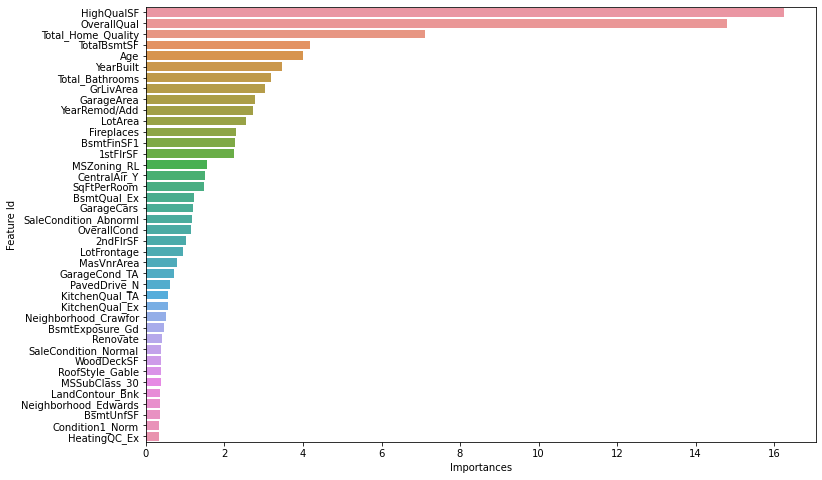

In [78]:
# Plotting top 20 features' importance

plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:40],feat_imp['Feature Id'][:40], orient = 'h')
plt.show()

In [81]:
# Features' Interactions

train_data = Pool(X_train)

interaction = cat_model.get_feature_importance(train_data, type="Interaction")
column_names = X_train.columns.values 
interaction = pd.DataFrame(interaction, columns=["feature1", "feature2", "importance"])
interaction.feature1 = interaction.feature1.apply(lambda l: column_names[int(l)])
interaction.feature2 = interaction.feature2.apply(lambda l: column_names[int(l)])
interaction.head(20)

,feature1,feature2,importance
0,OverallQual,HighQualSF,0.994197
1,Total_Home_Quality,HighQualSF,0.813330
2,LotArea,OverallQual,0.504272
3,YearRemod/Add,HighQualSF,0.481896
4,OverallQual,Total_Bathrooms,0.432604
5,BsmtFinSF1,HighQualSF,0.409846
6,LotArea,HighQualSF,0.397274
7,OverallQual,BsmtFinSF1,0.380635
8,YearBuilt,HighQualSF,0.376626
9,OverallQual,GarageArea,0.361624


Which are the deafult parameters used by CaboostRegressor? This is our real baseline, now we need to optimize the hyperparameters trying to tune the model to obtain a better performance.

In [82]:
# Catboost default paramters

cat_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.0564580000936985,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 1,
 'bootstrap_type': 'MVS',
 'max_leaves'

### Hyperparameter Optimization

In [ ]:
# # Preforming a Random Grid Search to find the best combination of parameters

# grid = {'iterations': [16000,20000,25000,30000],
#         'learning_rate': [0.04,0.05,0.01,0.002,0.005],
#         'depth': [1,2,3,4,5,6,7,8],
#         'l2_leaf_reg': [1, 3, 5, 9,13,15,17],
#         'max_leaves' : [8,10,12,14,16,32,64],
#         'early_stopping_rounds': [200],
#         'model_size_reg' : [0.2,0.5,0.7,0.9]}

# final_model = CatBoostRegressor()
# randomized_search_result = final_model.randomized_search(grid,
#                                                    X = X_train,
#                                                    y= y_train,
#                                                    verbose = False,
#                                                    plot=True)
                                                   

In [ ]:
# randomized_search_result['params']

In [83]:
# Final Cat-Boost Regressor

params = {'max_leaves': 8,
          'depth': 3,
          'od_wait': 200,
          'l2_leaf_reg': 3,
          'iterations': 200000,
          'model_size_reg': 0.7,
          'learning_rate': 0.05,
          'random_seed': 42 }

# params = {'iterations': 4000,
#           'learning_rate': 0.002,
#           'depth': 4,
#           'l2_leaf_reg': 1,
#           'eval_metric':'RMSE',
#           'max_leaves':16,
#           'early_stopping_rounds': 200,
#           'model_size_reg':0.7,
#           'verbose': 200,
#           'random_seed': 42}
         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_val)
catf_score = rmse(y_val, catf_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 

In [84]:
catf_score

0.103268423905672

### SUBMISSION

In [41]:
# Test CSV Submission

test_pred = cat_model_f.predict(test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

,Id,SalePrice
0,1461,121012.674280
1,1462,159997.808309
2,1463,181261.515114
3,1464,188620.010054
4,1465,188215.196492


In [43]:
# Saving the results in a csv file

submission.to_csv("submission_ff.csv", index = False, header = True)